<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/EDA_on_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this file evaluates relation between accuracy and parts of speech for each language
#using bar plots and treemaps

Statistics for German

Frequency Distribution of Parts of Speech:
Part of Speech
VERB    14
DET     12
ADJ      6
ADV      3
PRON     1
Name: count, dtype: int64

Average Performance by Part of Speech:
Part of Speech
PRON    1.000000
DET     0.965341
ADV     0.953526
VERB    0.944558
ADJ     0.922276
Name: Accuracy Rate, dtype: float64


<ipython-input-2-b732b5bdef38>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_frequency.index, y=pos_frequency.values, palette=sns.color_palette(color_palette, len(pos_frequency)))


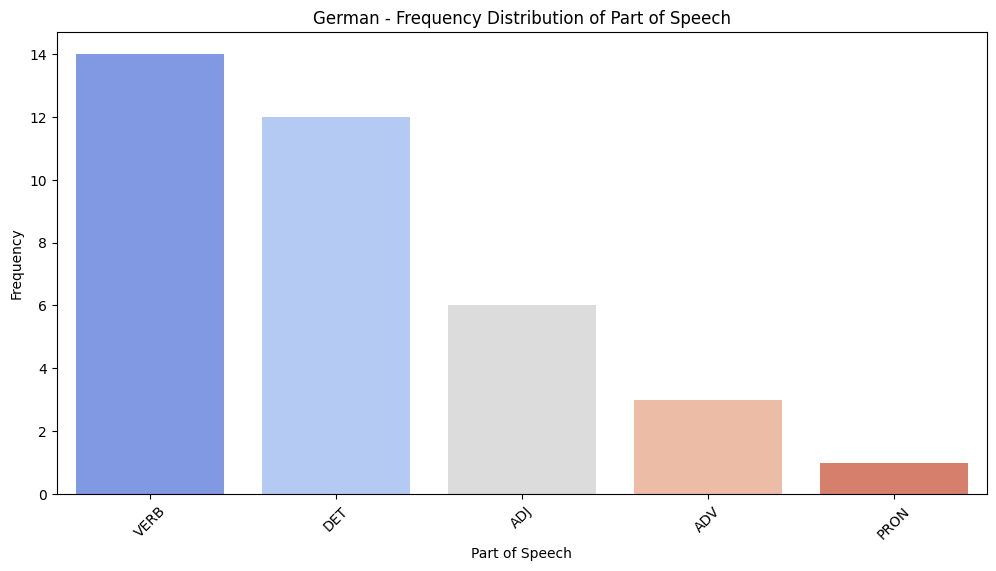

<ipython-input-2-b732b5bdef38>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_performance_pos.index, y=avg_performance_pos.values, palette=sns.color_palette(color_palette, len(avg_performance_pos)))


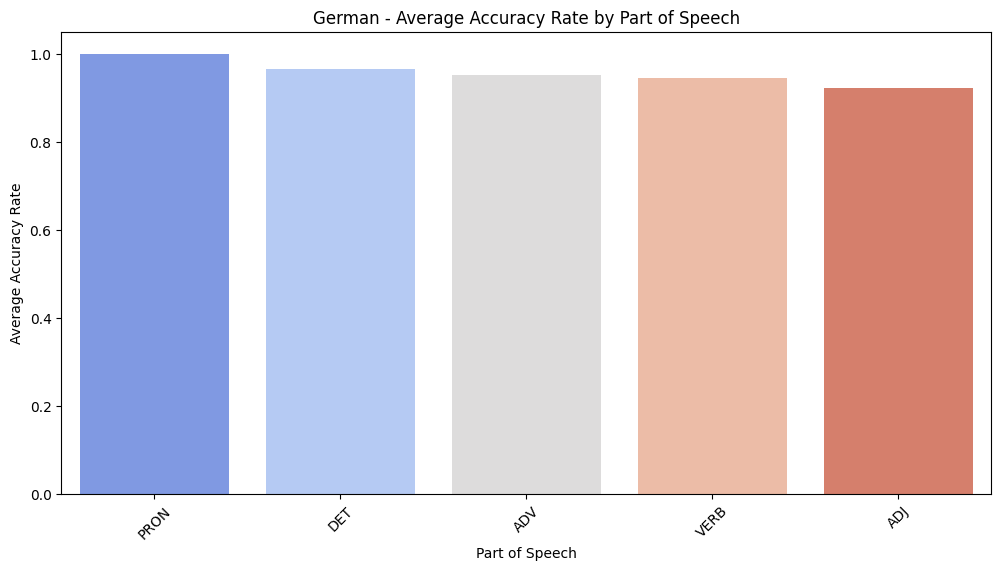

Statistics for Korean

Frequency Distribution of Parts of Speech:
Part of Speech
NOUN     82
VERB     40
INTJ      4
ADJ       2
PROPN     2
ADV       2
Name: count, dtype: int64

Average Performance by Part of Speech:
Part of Speech
ADJ      1.000000
ADV      1.000000
PROPN    1.000000
NOUN     0.898870
INTJ     0.888889
VERB     0.815801
Name: Accuracy Rate, dtype: float64


<ipython-input-2-b732b5bdef38>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_frequency.index, y=pos_frequency.values, palette=sns.color_palette(color_palette, len(pos_frequency)))


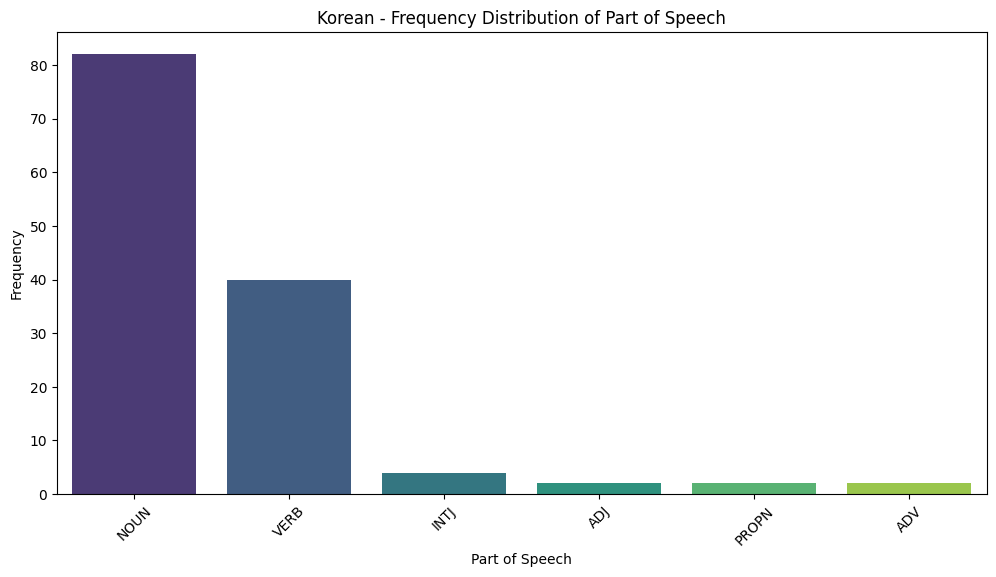

<ipython-input-2-b732b5bdef38>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_performance_pos.index, y=avg_performance_pos.values, palette=sns.color_palette(color_palette, len(avg_performance_pos)))


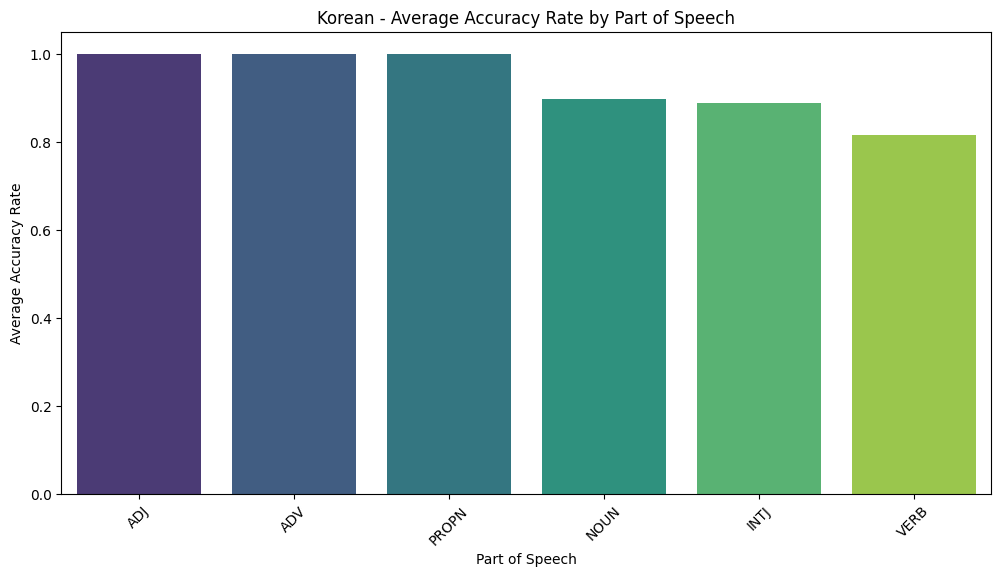

Statistics for Italian

Frequency Distribution of Parts of Speech:
Part of Speech
NOUN     553
VERB     487
ADJ      145
ADV      115
DET       71
ADP       49
PRON      32
CCONJ      8
AUX        6
INTJ       5
PROPN      3
NUM        2
PUNCT      2
SCONJ      1
X          1
Name: count, dtype: int64

Average Performance by Part of Speech:
Part of Speech
NUM      1.000000
X        1.000000
NOUN     0.870091
ADJ      0.845839
PROPN    0.833333
VERB     0.812832
INTJ     0.800000
PRON     0.797513
ADV      0.792719
DET      0.782599
ADP      0.755613
PUNCT    0.750000
CCONJ    0.747619
AUX      0.736111
SCONJ    0.500000
Name: Accuracy Rate, dtype: float64


<ipython-input-2-b732b5bdef38>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_frequency.index, y=pos_frequency.values, palette=sns.color_palette(color_palette, len(pos_frequency)))


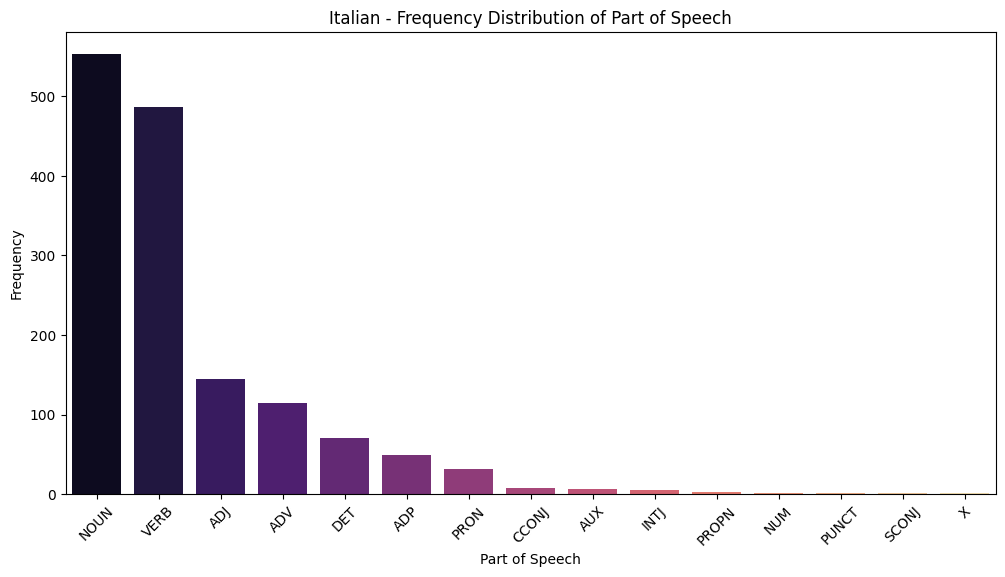

<ipython-input-2-b732b5bdef38>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_performance_pos.index, y=avg_performance_pos.values, palette=sns.color_palette(color_palette, len(avg_performance_pos)))


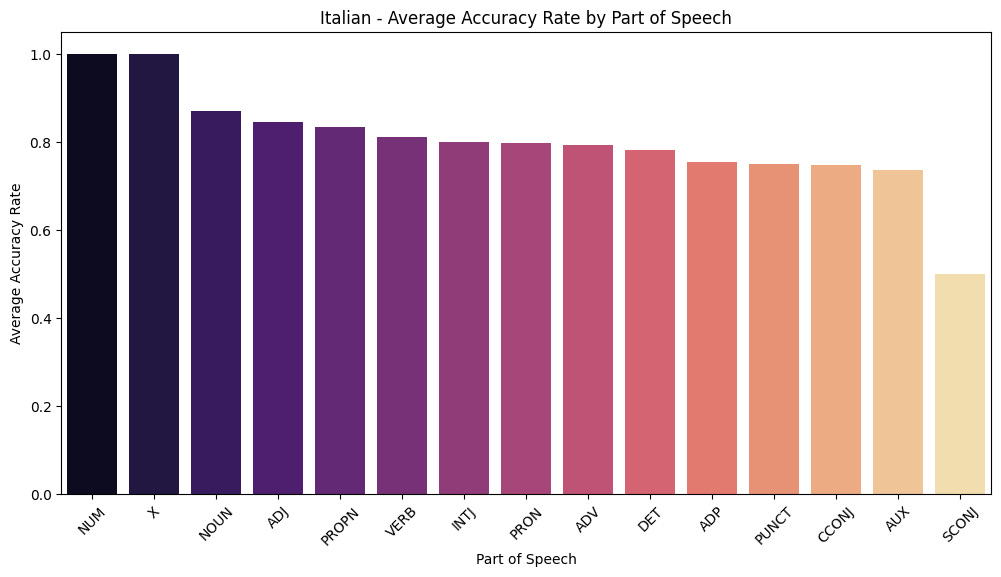

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_progress_with_pos_stanza.csv'
korean_file = '/content/kr_progress_with_pos_stanza.csv'
italian_file = '/content/ita_progress_with_pos_stanza.csv'

# Define a function to perform Part of Speech (POS) analysis and visualization
def pos_analysis(file_path, language, color_palette):
    # Load the data
    data = pd.read_csv(file_path)

    # Ensure columns are treated as numeric
    data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
    data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
    data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

    # Drop rows where part of speech is missing
    data = data.dropna(subset=['Part of Speech'])

    # Frequency distribution of parts of speech
    pos_frequency = data['Part of Speech'].value_counts()

    # Average performance by part of speech
    data['Accuracy Rate'] = data['Correct answers'] / (data['Correct answers'] + data['Incorrect answers'])
    avg_performance_pos = data.groupby('Part of Speech')['Accuracy Rate'].mean().sort_values(ascending=False)

    # Print the statistics
    print(f"Statistics for {language}")
    print("\nFrequency Distribution of Parts of Speech:")
    print(pos_frequency)
    print("\nAverage Performance by Part of Speech:")
    print(avg_performance_pos)

    # Plot frequency distribution of POS with updated color scheme
    plt.figure(figsize=(12, 6))
    sns.barplot(x=pos_frequency.index, y=pos_frequency.values, palette=sns.color_palette(color_palette, len(pos_frequency)))
    plt.title(f'{language} - Frequency Distribution of Part of Speech')
    plt.xlabel('Part of Speech')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Plot average accuracy by POS with richer colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_performance_pos.index, y=avg_performance_pos.values, palette=sns.color_palette(color_palette, len(avg_performance_pos)))
    plt.title(f'{language} - Average Accuracy Rate by Part of Speech')
    plt.xlabel('Part of Speech')
    plt.ylabel('Average Accuracy Rate')
    plt.xticks(rotation=45)
    plt.show()

# Apply the function for German, Korean, and Italian
pos_analysis(german_file, 'German', 'coolwarm')
pos_analysis(korean_file, 'Korean', 'viridis')
pos_analysis(italian_file, 'Italian', 'magma')


In [4]:
!pip install squarify


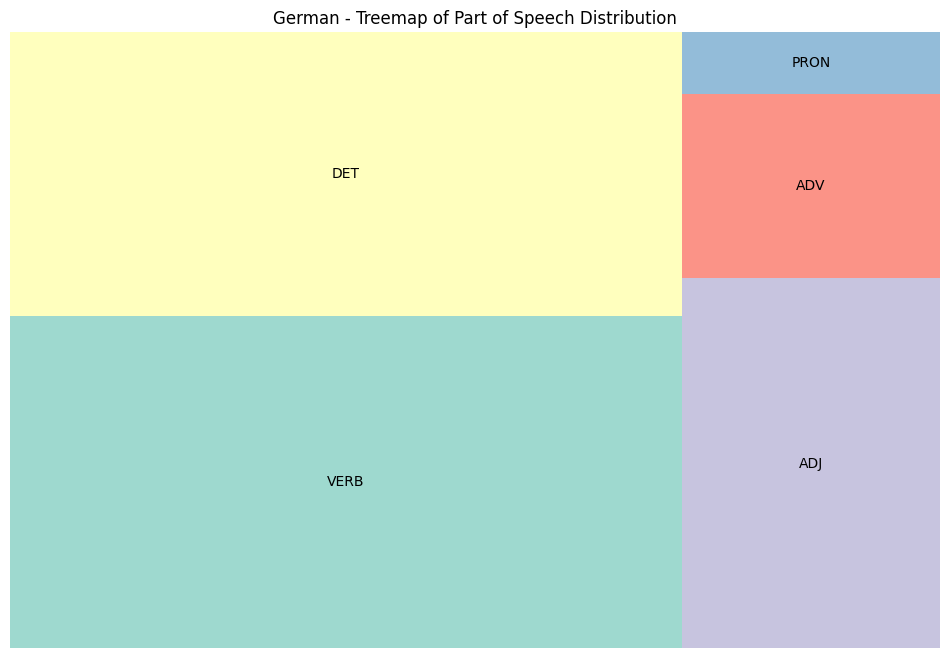

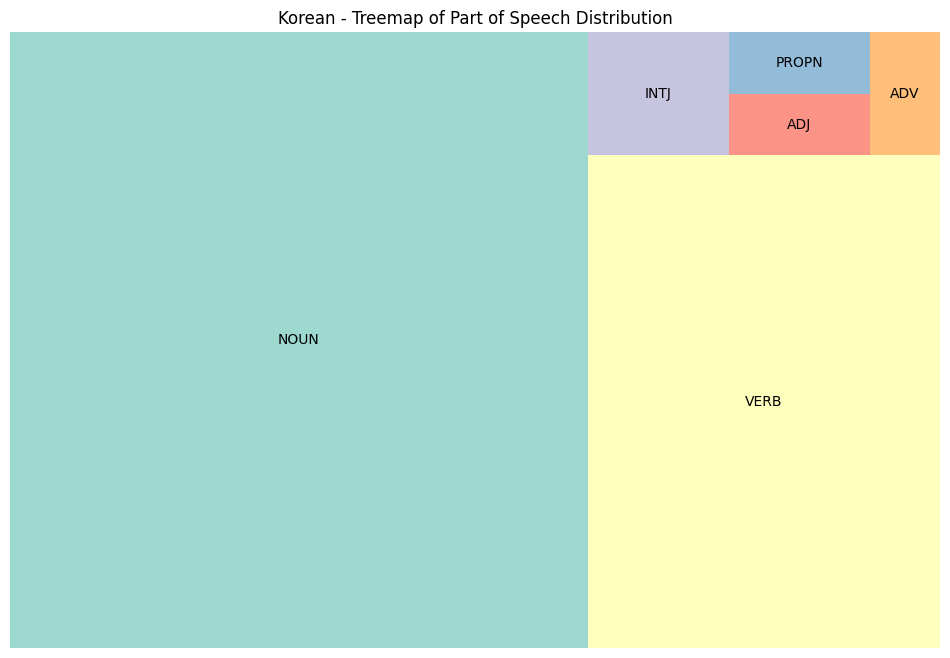

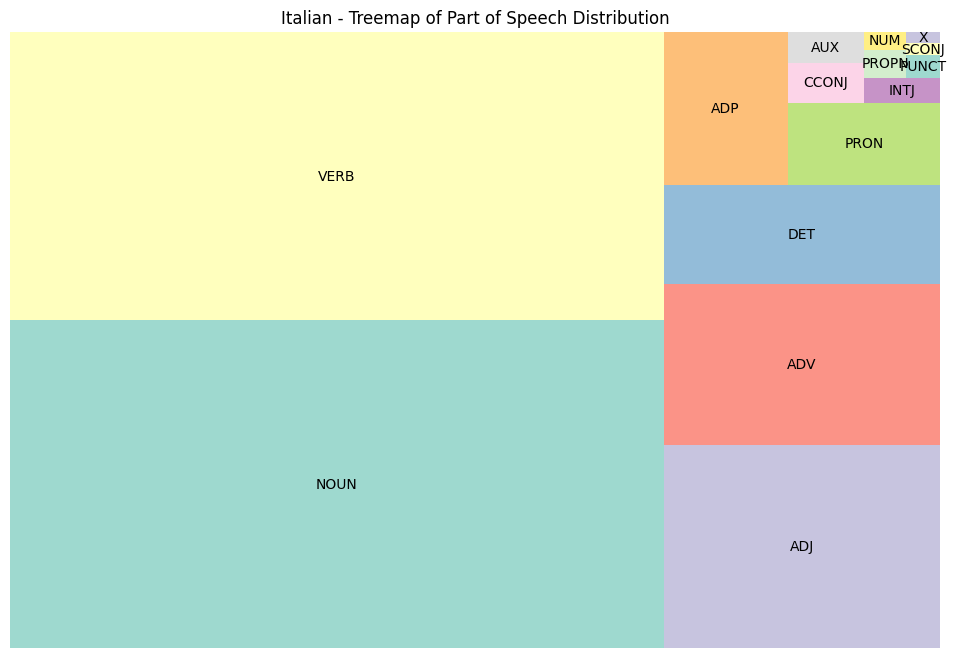

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_progress_with_pos_stanza.csv'
korean_file = '/content/kr_progress_with_pos_stanza.csv'
italian_file = '/content/ita_progress_with_pos_stanza.csv'

# Define a function to create a vibrant treemap for part of speech analysis
def pos_treemap(file_path, language):
    # Load the data
    data = pd.read_csv(file_path)

    # Drop rows where part of speech is missing
    data = data.dropna(subset=['Part of Speech'])

    # Frequency distribution of parts of speech
    pos_frequency = data['Part of Speech'].value_counts()

    # Use Seaborn's Set3 color palette for better contrast
    colors = sns.color_palette('Set3', len(pos_frequency))

    # Create a treemap with vibrant colors
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=pos_frequency.values, label=pos_frequency.index, alpha=0.85, color=colors)
    plt.title(f'{language} - Treemap of Part of Speech Distribution')
    plt.axis('off')
    plt.show()

# Apply the function for German, Korean, and Italian with vibrant colors
pos_treemap(german_file, 'German')
pos_treemap(korean_file, 'Korean')
pos_treemap(italian_file, 'Italian')
